In [1]:
import pandas as pd

# CSV loading
movies = pd.read_csv("movies.csv")
ratings = pd.read_csv("ratings.csv")

# Merge movies + ratings on 'movieId'
movie_ratings = pd.merge(ratings, movies, on='movieId')

# Merge 
print(movie_ratings.head())
print(movie_ratings.info())

   userId  movieId  rating  timestamp  \
0       1       17     4.0  944249077   
1       1       25     1.0  944250228   
2       1       29     2.0  943230976   
3       1       30     5.0  944249077   
4       1       32     5.0  943228858   

                                               title  \
0                       Sense and Sensibility (1995)   
1                           Leaving Las Vegas (1995)   
2  City of Lost Children, The (Cité des enfants p...   
3  Shanghai Triad (Yao a yao yao dao waipo qiao) ...   
4          Twelve Monkeys (a.k.a. 12 Monkeys) (1995)   

                                   genres  
0                           Drama|Romance  
1                           Drama|Romance  
2  Adventure|Drama|Fantasy|Mystery|Sci-Fi  
3                             Crime|Drama  
4                 Mystery|Sci-Fi|Thriller  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32000204 entries, 0 to 32000203
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------   

In [2]:
# Check missing values
print(movie_ratings.isnull().sum())

userId       0
movieId      0
rating       0
timestamp    0
title        0
genres       0
dtype: int64


In [4]:
# Count duplicates
print(movie_ratings.duplicated().sum())



0


In [5]:
# Ensure rating is float
movie_ratings['rating'] = movie_ratings['rating'].astype(float)

# If timestamp is needed as datetime
movie_ratings['timestamp'] = pd.to_datetime(movie_ratings['timestamp'], unit='s')

In [5]:
 #Optional: Split genres into list
movie_ratings['genres_list'] = movie_ratings['genres'].str.split('|')

In [6]:
import pandas as pd
from scipy import stats

# Mean rating
mean_rating = movie_ratings['rating'].mean()
# Median rating
median_rating = movie_ratings['rating'].median()
# Mode rating
mode_rating = movie_ratings['rating'].mode()[0]

# Print results
print(f"Mean rating: {mean_rating:.2f}")
print(f"Median rating: {median_rating}")
print(f"Mode rating: {mode_rating}")

# Optional: Min and Max rating
print(f"Min rating: {movie_ratings['rating'].min()}")
print(f"Max rating: {movie_ratings['rating'].max()}")

Mean rating: 3.54
Median rating: 3.5
Mode rating: 4.0
Min rating: 0.5
Max rating: 5.0


In [7]:
# Average rating per movie
movie_avg = movie_ratings.groupby('title')['rating'].mean()

# Count of ratings per movie
movie_count = movie_ratings.groupby('title')['rating'].count()

# Combine into one dataframe
top_movies = pd.DataFrame({'avg_rating': movie_avg, 'rating_count': movie_count})

# Filter movies with at least 10 ratings (optional)
top_movies = top_movies[top_movies['rating_count'] >= 10]

# Sort by average rating descending
top_movies = top_movies.sort_values(by='avg_rating', ascending=False)

# Show top 10 movies
print(top_movies.head(10))

                                                    avg_rating  rating_count
title                                                                       
New York: A Documentary Film (1999)                   4.500000            11
Planet Earth II (2016)                                4.446830          1956
Planet Earth (2006)                                   4.444369          2948
National Theatre Live: Fleabag (2019)                 4.441176            17
Band of Brothers (2001)                               4.426539          2811
Shawshank Redemption, The (1994)                      4.404614        102929
Kumbalangi Nights (2019)                              4.400000            15
Michael Jackson: Dangerous Tour (Bucharest, 199...    4.400000            10
The Work of Director Chris Cunningham (2003)          4.395833            24
Infinity Train (2016)                                 4.363636            11


In [8]:
# Count average rating per genre
genres = ['Action', 'Comedy', 'Drama', 'Romance', 'Thriller', 'Horror', 'Adventure']

for genre in genres:
    genre_movies = movie_ratings[movie_ratings['genres'].str.contains(genre)]
    print(f"{genre} -> Average rating: {genre_movies['rating'].mean():.2f}, Count: {len(genre_movies)}")

Action -> Average rating: 3.48, Count: 9665213
Comedy -> Average rating: 3.43, Count: 11206926
Drama -> Average rating: 3.68, Count: 13973271
Romance -> Average rating: 3.55, Count: 5524615
Thriller -> Average rating: 3.53, Count: 8679464
Horror -> Average rating: 3.31, Count: 2492315
Adventure -> Average rating: 3.52, Count: 7590522


In [27]:
import matplotlib.pyplot as plt
import seaborn as sns


# Set style
sns.set(style="whitegrid")

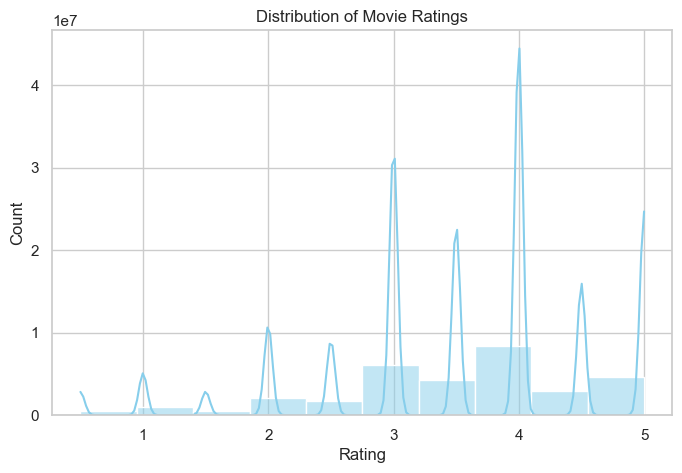

In [10]:
plt.figure(figsize=(8,5))
sns.histplot(movie_ratings['rating'], bins=10, kde=True, color='skyblue')
plt.title("Distribution of Movie Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

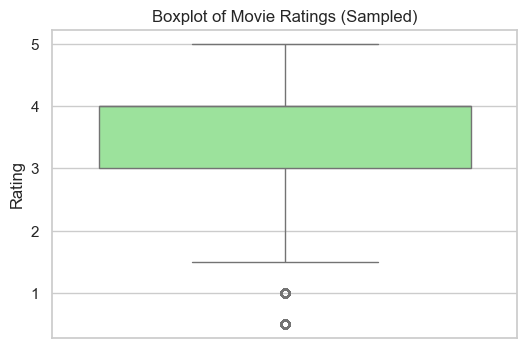

In [11]:
# Take a random sample of 10,000 ratings
sample_ratings = movie_ratings['rating'].sample(10000, random_state=42)

plt.figure(figsize=(6,4))
sns.boxplot(y=sample_ratings, color='lightgreen')
plt.title("Boxplot of Movie Ratings (Sampled)")
plt.ylabel("Rating")
plt.show()

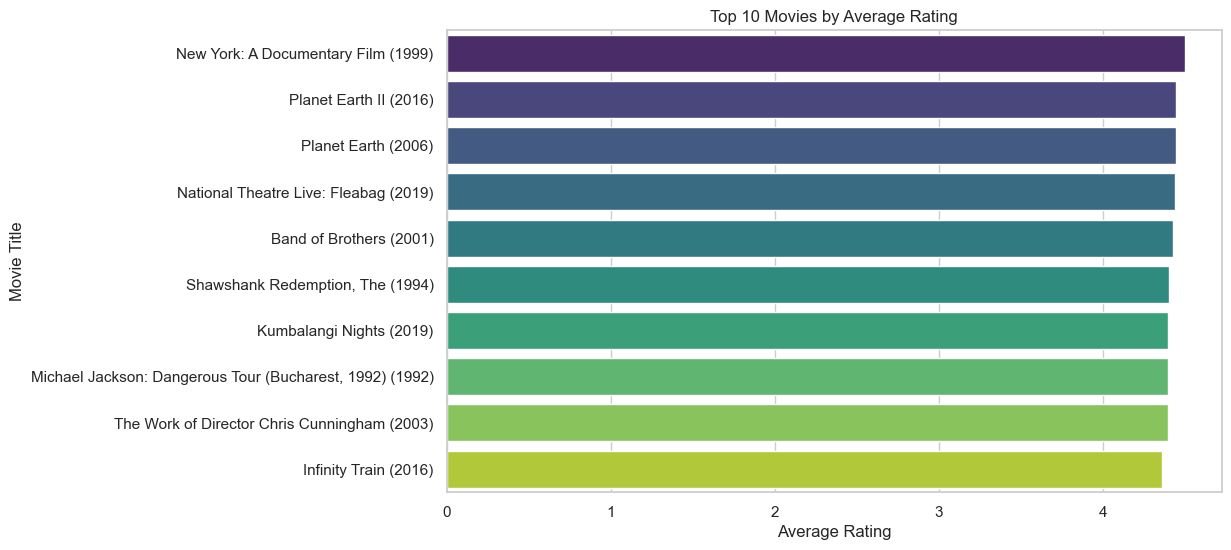

In [24]:
# Use the top_movies dataframe from Step 3
top10 = top_movies.head(10)
import warnings
warnings.filterwarnings("ignore")

plt.figure(figsize=(10,6))
sns.barplot(x='avg_rating', y=top10.index, data=top10, palette='viridis')
plt.title("Top 10 Movies by Average Rating")
plt.xlabel("Average Rating")
plt.ylabel("Movie Title")
plt.show()

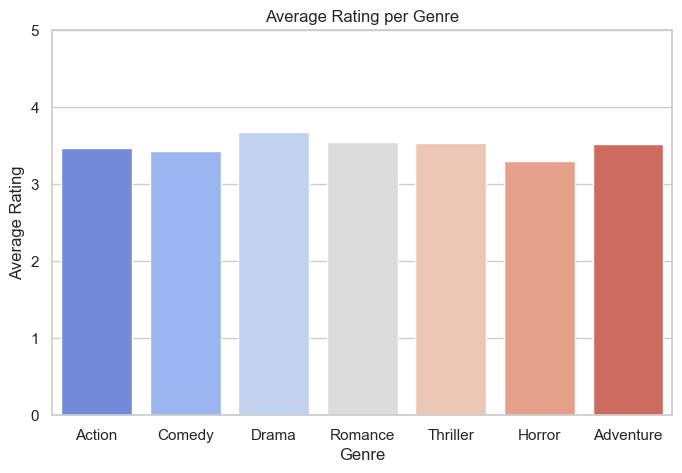

In [25]:
warnings.filterwarnings("ignore")
genres_avg = {}

genres = ['Action', 'Comedy', 'Drama', 'Romance', 'Thriller', 'Horror', 'Adventure']

for genre in genres:
    genre_movies = movie_ratings[movie_ratings['genres'].str.contains(genre)]
    genres_avg[genre] = genre_movies['rating'].mean()

# Plot
plt.figure(figsize=(8,5))
sns.barplot(x=list(genres_avg.keys()), y=list(genres_avg.values()), palette='coolwarm')
plt.title("Average Rating per Genre")
plt.ylabel("Average Rating")
plt.xlabel("Genre")
plt.ylim(0,5)
plt.show()

DASHBOARD

# Movie Ratings Analysis Dashboard
*Dataset:* MovieLens (movies.csv + ratings.csv)

---

## 1. Summary Statistics
- Mean Rating: 3.54
- Median Rating: 3.5
- Mode Rating: 4.0

## 2. Rating Distribution
Histogram & Boxplot showing rating spread.

## 3. Top 10 Movies
Bar chart of highest-rated movies.

## 4. Genre Analysis
Average rating per genre.

In [17]:
import pandas as pd

summary_stats = {
    'Metric': ['Mean', 'Median', 'Mode', 'Min', 'Max'],
    'Rating': [
        movie_ratings['rating'].mean(),
        movie_ratings['rating'].median(),
        movie_ratings['rating'].mode()[0],
        movie_ratings['rating'].min(),
        movie_ratings['rating'].max()
    ]
}

summary_df = pd.DataFrame(summary_stats)
summary_df

,Metric,Rating
0,Mean,3.540396
1,Median,3.500000
2,Mode,4.000000
3,Min,0.500000
4,Max,5.000000


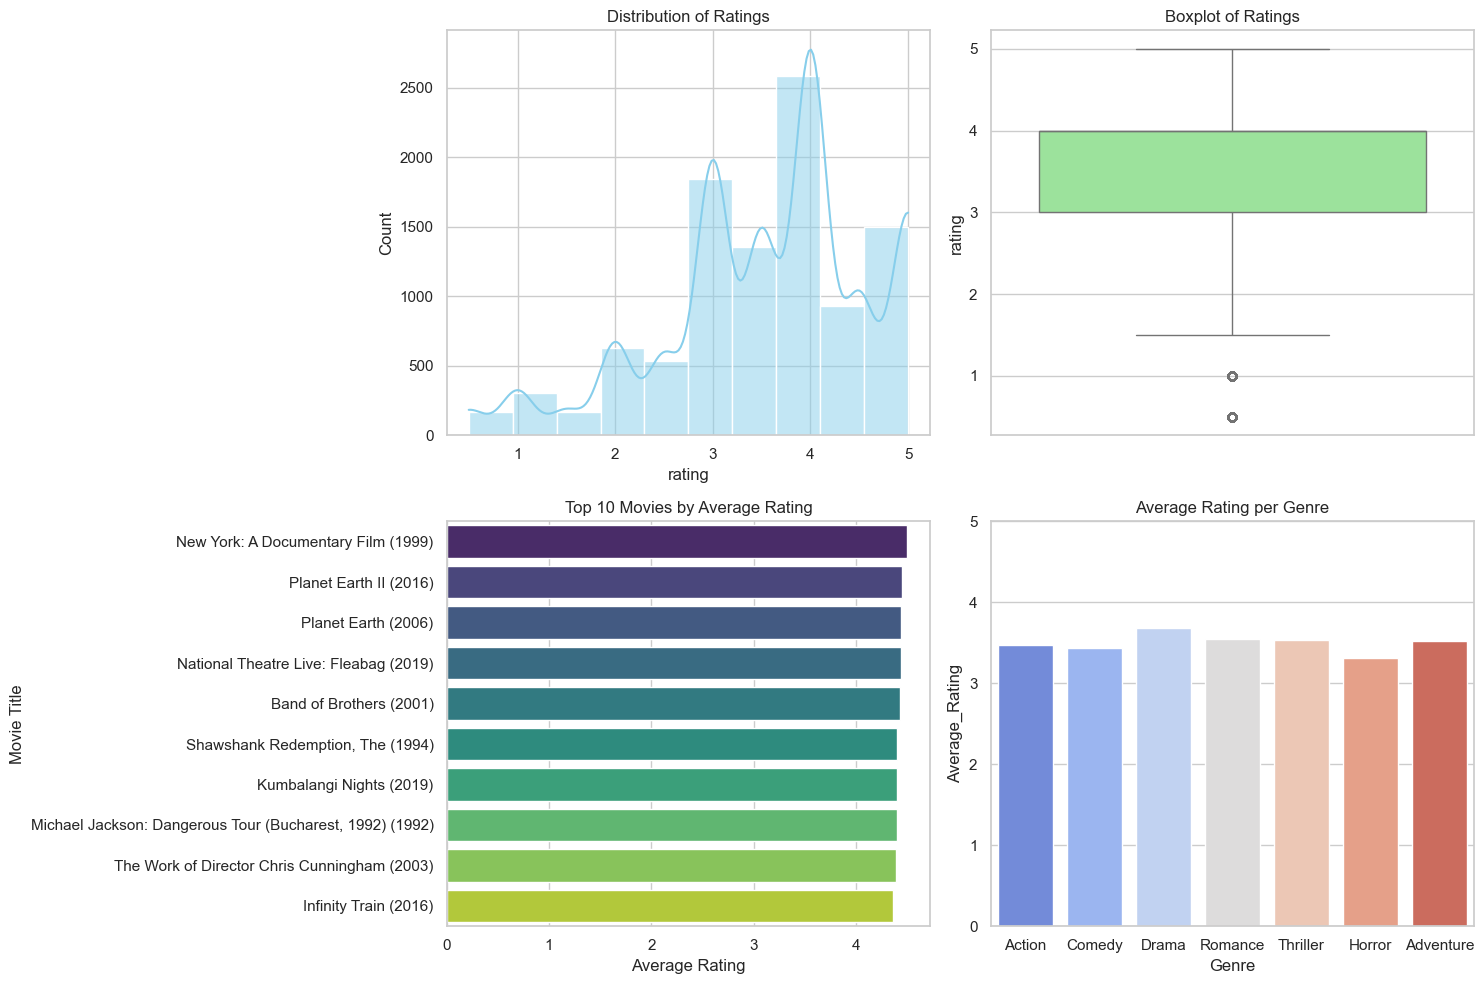

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings("ignore")

sns.set(style="whitegrid")

# Sample ratings for memory efficiency
sample_ratings = movie_ratings['rating'].sample(10000, random_state=42)

# Create 2x2 subplot
fig, axes = plt.subplots(2, 2, figsize=(15,10))

# 1️⃣ Histogram
sns.histplot(sample_ratings, bins=10, kde=True, color='skyblue', ax=axes[0,0])
axes[0,0].set_title("Distribution of Ratings")

# 2️⃣ Boxplot
sns.boxplot(y=sample_ratings, color='lightgreen', ax=axes[0,1])
axes[0,1].set_title("Boxplot of Ratings")

# 3️⃣ Top 10 Movies
top10 = top_movies.head(10)
sns.barplot(x='avg_rating', y=top10.index, data=top10, palette='viridis', ax=axes[1,0])
axes[1,0].set_title("Top 10 Movies by Average Rating")
axes[1,0].set_xlabel("Average Rating")
axes[1,0].set_ylabel("Movie Title")

# 4️⃣ Average Genre Rating
genres_avg_df = pd.DataFrame({'Genre': list(genres_avg.keys()), 'Average_Rating': list(genres_avg.values())})
sns.barplot(x='Genre', y='Average_Rating', data=genres_avg_df, palette='coolwarm', ax=axes[1,1])
axes[1,1].set_title("Average Rating per Genre")
axes[1,1].set_ylim(0,5)

plt.tight_layout()  # adjusts spacing
plt.show()